# Big Data 분석(II) 일일 과제물

##### A2 노소은

Q) 유방암 결과를 분류하는 신경망 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라.   
　그리고 모델의 정확도와 confusion matrix를 구하라.  

- 데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)  
- 목표변수(diagnosis : 양성(108개), 음성(benign, 212개

In [28]:
#데이터 구성:Series, DataFrame
import pandas as pd
#데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

#데이터 scaling
from sklearn.preprocessing import StandardScaler
#데이터 분할:train, test
from sklearn.model_selection import train_test_split
#분류 SVM
from sklearn.svm import SVC
#최적 모델, 파라미터 탐새
from sklearn.model_selection import GridSearchCV

#분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#한글 폰트 적용
matplotlib.rc("font", family = "Noto Sans CJK JP")

#### 1. 데이터 구성하기

파일 저장장소 입력

In [29]:
df = pd.read_csv("C:/Users/소은/Desktop/Academy/빅데이터/Big Data 분석/유방암.csv", engine = "python", encoding = "cp949")
df.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


#### 1.데이터 구성하기-결측치 처리

In [30]:
df.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

- 결측치 없음을 확인함

In [31]:
df_y=df["diagnosis"]                                # 목표번수 : diagnosis
df_x=df.drop("diagnosis", axis=1, inplace=False) 

#### 1.데이터 구성하기-더미변수 생성

In [32]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_양성,diagnosis_음성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,0,1
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,1,0
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,0,1
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,1,0
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1,0


#### 1.데이터 구성하기-데이터 분할

In [36]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, 
                                                                test_size=0.4, random_state=1234)
print("train data x size : {}".format(df_train_x.shape))
print("train data y size : {}".format(df_train_y.shape))
print("test data x size : {}".format(df_test_x.shape))
print("test data y size : {}".format(df_test_y.shape))

train data x size : (192, 30)
train data y size : (192,)
test data x size : (128, 30)
test data y size : (128,)


- 문제에서 주어진대로 test 사이즈를 0.4로 설정함

In [37]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
#test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.885
Accuracy on test set: 0.891


- 모델 정확도는 train  88.5%, test 89.1%로 test set이 더 정확함

In [35]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#c: 규제(0.01, 0.1, 1, 10)
para_c = [10**c for c in range(-2, 2)]
#para_c = [0.1*c for c in range(1, 10)] # C 변화 구간 변경

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

#데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [9]:
#C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.758
1,0.10,0.854,0.859
2,1.00,0.885,0.891
3,10.00,0.906,0.922


findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


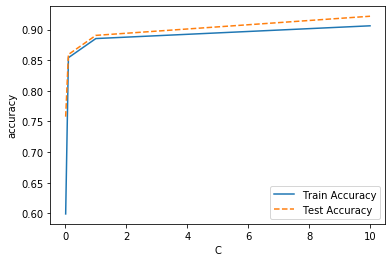

In [10]:
#모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("C")
plt.legend()

In [11]:
#Cost 지정
C = 0.1

In [12]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#gamma: 규제(0.01, 0.1, 1, 10)
para_gamma = [10**gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.1, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

#데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [13]:
#gamma별 정확도 테이블
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.7578
1,0.10,0.599,0.7578
2,1.00,0.599,0.7578
3,10.00,0.599,0.7578


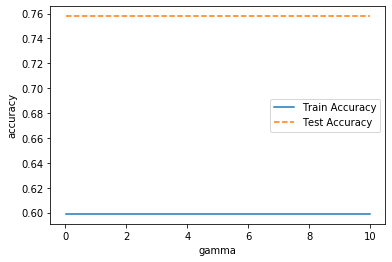

In [14]:
#모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("gamma")
plt.legend()

In [15]:
#변수명 저장
v_feature_name = df_train_x.columns
#StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [16]:
#데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


In [17]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
#train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
#test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.961


In [18]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#c: 규제(0.01, 0.1, 1, 10)
para_c = [0.1**c for c in range(0, 10)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

#데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [19]:
#C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,1.000,0.995,0.961
1,0.100,0.964,0.906
2,0.010,0.599,0.758
3,0.001,0.599,0.758
4,0.000,0.599,0.758
5,0.000,0.599,0.758
6,0.000,0.599,0.758
7,0.000,0.599,0.758
8,0.000,0.599,0.758
9,0.000,0.599,0.758


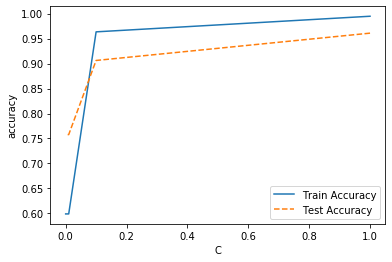

In [20]:
#모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("C")
plt.legend()

In [21]:
#임의로 지정
C = 1

In [22]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#gamma: 규제(0.01, 0.1, 1, 10)
#para_gamma = [10**gamma for gamma in range(-2, 2)]
para_gamma = [0.5**gamma for gamma in range(1, 10)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

#데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [23]:
#gamma별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.500,1.000,0.867
1,0.250,1.000,0.891
2,0.125,1.000,0.914
3,0.062,0.995,0.922
4,0.031,0.995,0.961
5,0.016,0.995,0.945
6,0.008,0.990,0.938
7,0.004,0.984,0.938
8,0.002,0.984,0.930


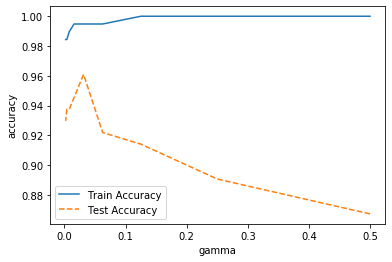

In [24]:
#모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("gamma")
plt.legend()

In [25]:
gamma = 0.1

In [26]:
svc_final = SVC(gamma = 0.1, C = 1, random_state=1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)
#train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
#test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_scaled_test_x, df_test_y)))
#confusion matrix
print("Condusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
#목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 0.922

Condusion matrix: 
[[27  4]
 [ 6 91]]
              precision    recall  f1-score   support

          양성      0.818     0.871     0.844        31
          음성      0.958     0.938     0.948        97

    accuracy                          0.922       128
   macro avg      0.888     0.905     0.896       128
weighted avg      0.924     0.922     0.923       128



In [27]:
estimator = SVC(random_state=1234)
#구하고자 하는 parameter와 범위
param_grid = {"C":para_c, 
             "gamma":para_gamma}
#정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.015625, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

best parameter: 
{'C': 1.0, 'gamma': 0.015625}

best score: 
0.984
